In [ ]:
# Bibliotecas Gerais
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import warnings
import numpy as np
from numpy import array
from importlib import reload
from sklearn.naive_bayes import GaussianNB
import pickle

warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 227

In [ ]:
# Bibliotecas para Construção do Modelo
import tensorflow.keras as keras
from tensorflow.python.keras.optimizer_v2 import rmsprop
from functools import partial
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Flatten, TimeDistributed, LSTM, Dense, Bidirectional, Dropout, ConvLSTM2D, Conv1D, GlobalMaxPooling1D, MaxPooling1D, Convolution1D, BatchNormalization, LeakyReLU
from tensorflow.keras.utils import plot_model

In [ ]:
# Pacotes Customizados
import functions
import plotting

In [ ]:
np.random.seed(666)

In [ ]:
df = pd.read_parquet('data/eth.parquet')
df.shape

(294536, 20)

In [ ]:
n_steps = 21 # Verificar de fato se o correto seria 20 ou 21
scaled_eth = functions.scale(df, scale=(0,1))

x_train, y_train, x_test, y_test = functions.split_sequences(                    
    scaled_eth.to_numpy()[:-1], 
    df[['target']].shift(-1).to_numpy()[:-1], 
    n_steps, 
    split=True, 
    ratio=0.8
)

In [ ]:
keras.backend.clear_session()

n_steps = x_train.shape[1]
n_features = x_train.shape[2]

model = Sequential()

model.add(Conv1D(filters=40, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=20, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(5, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 20, 40)            1640      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 10, 40)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 9, 20)             1620      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 4, 20)             0         
_________________________________________________________________
flatten (Flatten)            (None, 80)                0         
_________________________________________________________________
dense (Dense)                (None, 5)                 405       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

In [ ]:
model.fit(x_train, y_train, epochs = 100, verbose = 1, use_multiprocessing = True, validation_data = (x_test, y_test))

Epoch 1/100
7363/7363 [==============================] - 21s 3ms/step - loss: 0.0931 - mse: 0.0931 - val_loss: 0.0394 - val_mse: 0.0394
Epoch 2/100
7363/7363 [==============================] - 19s 3ms/step - loss: 0.0903 - mse: 0.0903 - val_loss: 0.0367 - val_mse: 0.0367
Epoch 3/100
7363/7363 [==============================] - 17s 2ms/step - loss: 0.0859 - mse: 0.0859 - val_loss: 0.0383 - val_mse: 0.0383
Epoch 4/100
7363/7363 [==============================] - 17s 2ms/step - loss: 0.0810 - mse: 0.0810 - val_loss: 0.0338 - val_mse: 0.0338
Epoch 5/100
7363/7363 [==============================] - 16s 2ms/step - loss: 0.0792 - mse: 0.0792 - val_loss: 0.0335 - val_mse: 0.0335
Epoch 6/100
7363/7363 [==============================] - 15s 2ms/step - loss: 0.0755 - mse: 0.0755 - val_loss: 0.0380 - val_mse: 0.0380
Epoch 7/100
7363/7363 [==============================] - 15s 2ms/step - loss: 0.0731 - mse: 0.0731 - val_loss: 0.0296 - val_mse: 0.0296
Epoch 8/100
7363/7363 [=========================

7363/7363 [==============================] - 27s 4ms/step - loss: 0.0335 - mse: 0.0335 - val_loss: 0.0137 - val_mse: 0.0137oss: 0.03
Epoch 61/100
7363/7363 [==============================] - 27s 4ms/step - loss: 0.0337 - mse: 0.0337 - val_loss: 0.0141 - val_mse: 0.0141
Epoch 62/100
7363/7363 [==============================] - 23s 3ms/step - loss: 0.0334 - mse: 0.0334 - val_loss: 0.0138 - val_mse: 0.0138
Epoch 63/100
7363/7363 [==============================] - 27s 4ms/step - loss: 0.0333 - mse: 0.0333 - val_loss: 0.0139 - val_mse: 0.0139 4s  - ETA: 2s - loss: 0.0330 -  - ETA: 0s - loss: 0.0333 - mse: 0
Epoch 64/100
7363/7363 [==============================] - 27s 4ms/step - loss: 0.0335 - mse: 0.0335 - val_loss: 0.0317 - val_mse: 0.0317
Epoch 65/100
7363/7363 [==============================] - 28s 4ms/step - loss: 0.0333 - mse: 0.0333 - val_loss: 0.0139 - val_mse: 0.0139
Epoch 66/100
7363/7363 [==============================] - 28s 4ms/step - loss: 0.0340 - mse: 0.0340 - val_loss: 0.01

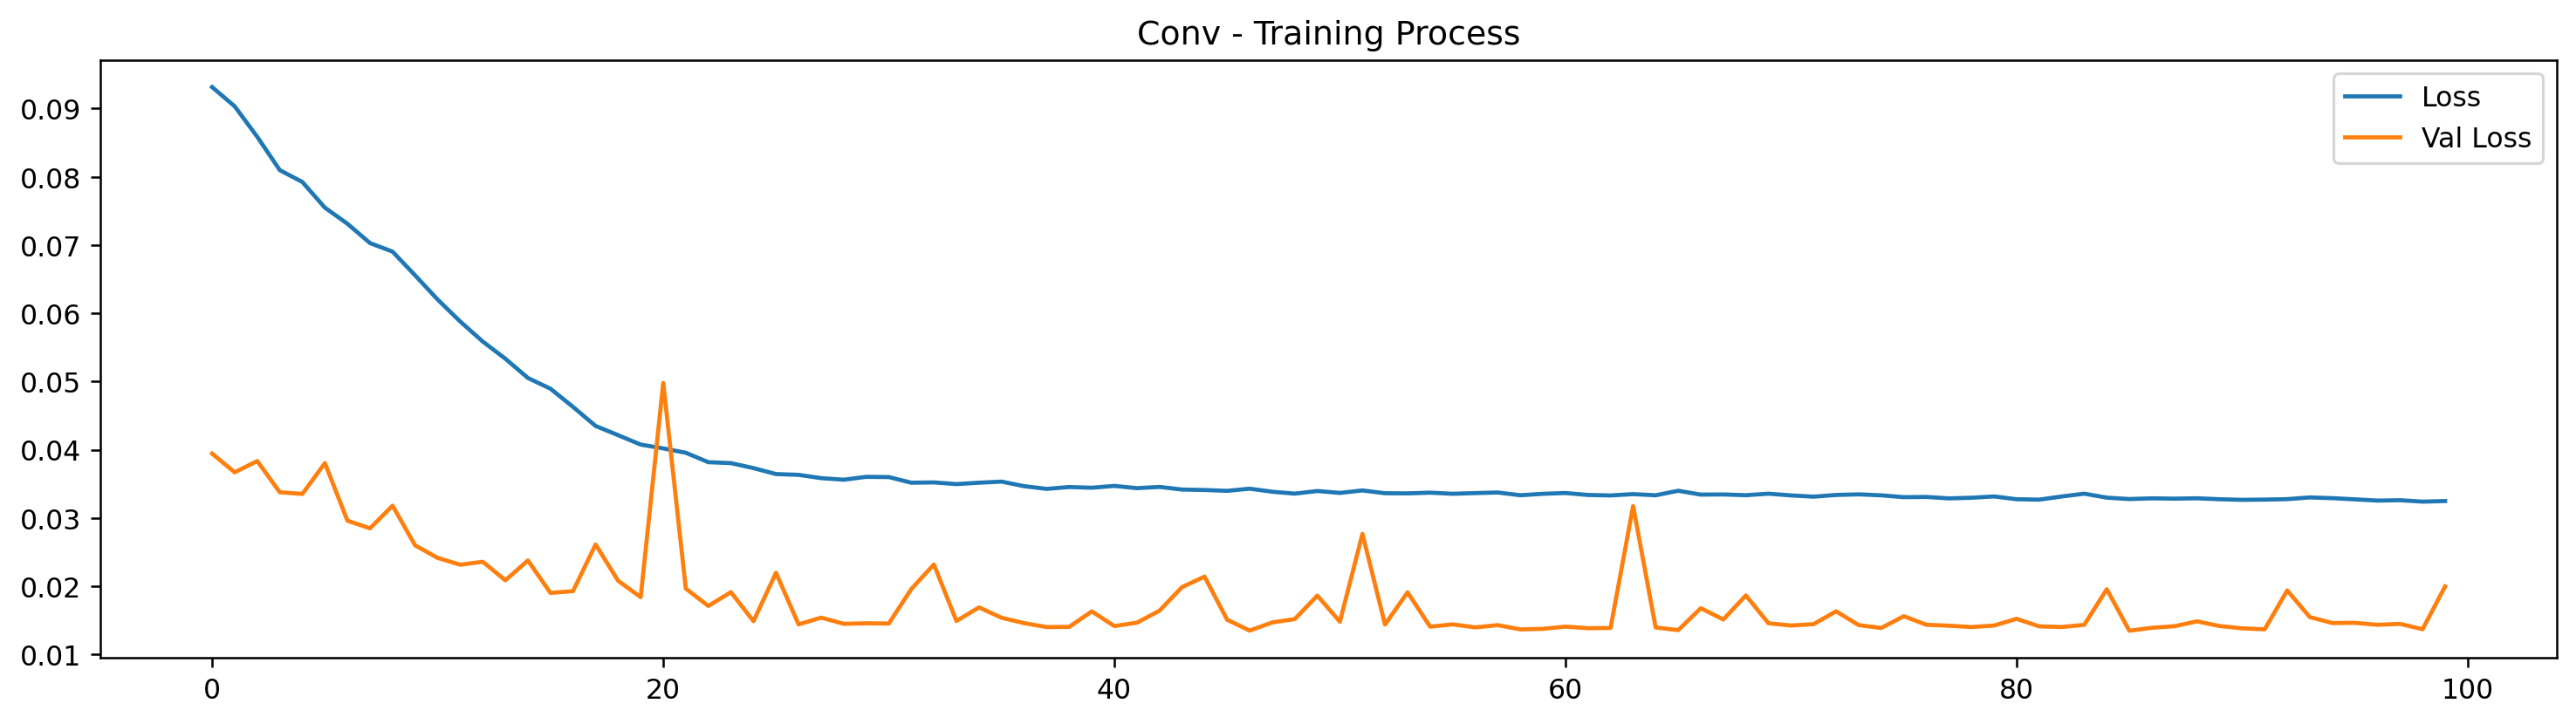

In [ ]:
plt.figure(figsize=(16,4))
plt.plot(model.history.history['loss'], label='Loss')
plt.plot(model.history.history['val_loss'], label='Val Loss')
plt.legend(loc=1)
plt.title('Conv - Training Process')
plt.show()

In [ ]:
pred, y_true, y_pred = functions.evaluation(
                    x_test, y_test, model, random=False, n_preds=50, 
                    show_graph=False)

MSE: 0.013556112357428594
Accuracy: 64%


In [ ]:
# Salvando o modelo em um arquivo pickle para ser utilizado nas etapas seguintes
# filename = 'model_CNN.pickle'
# pickle.dump(model, open(filename, 'wb'))